# AI
## CA0
### Navid Dehban - 810198390

## ca description :
the main goal of this project is estimating amount of co2 for some models of cars wich is in our data frame.
at first we have some nan values, so we put them in a another DF. 
then, with help of our certain datas we should creat a model wich estimate the co2 from the most correlated feature of cars. 
and finaly we should use that regression to find the value of those nan values.

# part 1 

in this section we use describe function to describe our data frame. we can see some fundamental and useful info about this csv file wich is opened by pandas library.
for each column we have count, mean, std, min, .25, .5, .75 and max.
count is the total number of every column, min is minimum and max is maximum obviously.
mean is title of average. 
.25, .5 and .75  are passed to percentile parameter to view the respective percentile of Numeric series.
std shows standard deviation of data frim.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
data = pd.read_csv('FuelConsumptionCo2.csv')
print (data.describe())

        Unnamed: 0  MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count  1067.000000     1067.0  1040.000000  1033.000000           1067.000000   
mean    533.000000     2014.0     3.324038     5.797677             13.296532   
std     308.160672        0.0     1.411400     1.807262              4.101253   
min       0.000000     2014.0     1.000000     3.000000              4.600000   
25%     266.500000     2014.0     2.000000     4.000000             10.250000   
50%     533.000000     2014.0     3.300000     6.000000             12.600000   
75%     799.500000     2014.0     4.200000     8.000000             15.550000   
max    1066.000000     2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510          

head function is used for showing first n rows in our data frim, tail function do the same thing vice versa. 
so it shows last n rows of the data frim.
in this section i show first 5 and last 5 rows as you can see. 

In [2]:
print (data.head(5))
print (data.tail(5))

   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0        4.0          AS5        Z                   9.9                  6.7   
1        4.0           M6        Z                  11.2                  7.7   
2        4.0          AV7        Z                   6.0                  5.8   
3        6.0          AS6        Z                  12.7                  9.1   
4        6.0          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0             

# part 2

as we can see with info function we are able to findout type of each column for example CYLINDERS column is float64.

In [3]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
Unnamed: 0                  1067 non-null int64
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1058 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1040 non-null float64
CYLINDERS                   1033 non-null float64
TRANSMISSION                1067 non-null object
FUELTYPE                    996 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                964 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 116.8+ KB
None


in this section we want to change x d z e with numbers [0,3]
z --> 0,
D --> 1,
E --> 2,
x --> 3

In [4]:
data['FUELTYPE'] = data['FUELTYPE'].replace(['Z'], '0')
data['FUELTYPE'] = data['FUELTYPE'].replace(['D'], '1')
data['FUELTYPE'] = data['FUELTYPE'].replace(['E'], '2')
data['FUELTYPE'] = data['FUELTYPE'].replace(['X'], '3')
print (data['FUELTYPE'] )
data

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19      NaN
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        1
28        0
29        1
       ... 
1037      3
1038      0
1039      0
1040    NaN
1041    NaN
1042      0
1043      3
1044      3
1045      3
1046      3
1047      0
1048      1
1049      1
1050      3
1051      0
1052      0
1053      0
1054      0
1055      1
1056      3
1057    NaN
1058      3
1059      3
1060      3
1061      3
1062      3
1063      3
1064      3
1065      3
1066      3
Name: FUELTYPE, Length: 1067, dtype: object


,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,0,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,0,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,0,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,0,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,0,12.1,8.7,10.6,27,244.0
5,5,2014,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,0,11.9,7.7,10.0,28,230.0
6,6,2014,ACURA,TL,MID-SIZE,3.5,6.0,AS6,0,11.8,8.1,10.1,28,232.0
7,7,2014,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,0,12.8,9.0,11.1,25,255.0
8,8,2014,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,0,13.4,9.5,11.6,24,267.0
9,9,2014,ACURA,TSX,COMPACT,2.4,4.0,AS5,0,10.6,7.5,9.2,31,212.0


# part 3 

In [5]:
def sumnan(df):
    number_of_nan = df.isna().sum()
    return number_of_nan

print ("number of nan in MODELYEAR column :",sumnan(data['MODELYEAR']))
print ("number of nan in MAKE column :",sumnan(data['MAKE']))
print ("number of nan in MODEL column :",sumnan(data['MODEL']))
print ("number of nan in VEHICLECLASS column :",sumnan(data['VEHICLECLASS']))

print ("number of nan in ENGINESIZE column :",sumnan(data['ENGINESIZE']))
print ("number of nan in CYLINDERS column :",sumnan(data['CYLINDERS']))
print ("number of nan in TRANSMISSION column :",sumnan(data['TRANSMISSION']))
print ("number of nan in FUELTYPE column :",sumnan(data['FUELTYPE']))

print ("number of nan in FUELCONSUMPTION_CITY column :",sumnan(data['FUELCONSUMPTION_CITY']))
print ("number of nan in FUELCONSUMPTION_HWY column :",sumnan(data['FUELCONSUMPTION_HWY']))
print ("number of nan in FUELCONSUMPTION_COMB column :",sumnan(data['FUELCONSUMPTION_COMB']))

print ("number of nan in FUELCONSUMPTION_COMB_MPG column :",sumnan(data['FUELCONSUMPTION_COMB_MPG']))
print ("number of nan in CO2EMISSIONS column :",sumnan(data['CO2EMISSIONS']))

number of nan in MODELYEAR column : 0
number of nan in MAKE column : 0
number of nan in MODEL column : 9
number of nan in VEHICLECLASS column : 0
number of nan in ENGINESIZE column : 27
number of nan in CYLINDERS column : 34
number of nan in TRANSMISSION column : 0
number of nan in FUELTYPE column : 71
number of nan in FUELCONSUMPTION_CITY column : 0
number of nan in FUELCONSUMPTION_HWY column : 0
number of nan in FUELCONSUMPTION_COMB column : 0
number of nan in FUELCONSUMPTION_COMB_MPG column : 0
number of nan in CO2EMISSIONS column : 103


in this section i want to change nan values in table with the mode and avg of columns. for example in fuel type column the mode of column is x. 
and in this we put x in the nan values.
advantage of putting average or mode instead of nans is that we odnt have any other nan and we can process our data and mine some patterns. because when we switch nans with mode or average, the main feature of the column will be fixed still.
but disadvantage of this method is reduccing variance. actually when we change nans with a certain number wich is average, a big amount of data will be one thing and may reduce the accurecy of results and trends.

In [6]:
def switch_str(df):
    m = df.mode()
    df = df.replace(np.nan, m[0])
    return df


def switch_numb(df):
    d = pd.to_numeric(df)
    m = d.mean()
    df = df.replace(np.nan, m)
    return df


data['MODEL'] = switch_str(data['MODEL'])
data['ENGINESIZE'] = switch_numb(data['ENGINESIZE'])
data['CYLINDERS'] = switch_numb(data['CYLINDERS'])
data['FUELTYPE'] = switch_str(data['FUELTYPE'])

data

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.000000,AS5,0,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.000000,M6,0,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.000000,AV7,0,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.000000,AS6,0,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.000000,AS6,0,12.1,8.7,10.6,27,244.0
5,5,2014,ACURA,RLX,MID-SIZE,3.5,6.000000,AS6,0,11.9,7.7,10.0,28,230.0
6,6,2014,ACURA,TL,MID-SIZE,3.5,6.000000,AS6,0,11.8,8.1,10.1,28,232.0
7,7,2014,ACURA,TL AWD,MID-SIZE,3.7,6.000000,AS6,0,12.8,9.0,11.1,25,255.0
8,8,2014,ACURA,TL AWD,MID-SIZE,3.7,6.000000,M6,0,13.4,9.5,11.6,24,267.0
9,9,2014,ACURA,TSX,COMPACT,2.4,4.000000,AS5,0,10.6,7.5,9.2,31,212.0


in this section, at first we will copy that lines wich has nan value for co2 column then we will drop this lines . 

In [7]:
new_df = data.loc[data['CO2EMISSIONS'].isna()]
data = data.dropna()
data

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.000000,AS5,0,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.000000,M6,0,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.000000,AV7,0,6.0,5.8,5.9,48,136.0
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.000000,AS6,0,12.1,8.7,10.6,27,244.0
5,5,2014,ACURA,RLX,MID-SIZE,3.5,6.000000,AS6,0,11.9,7.7,10.0,28,230.0
6,6,2014,ACURA,TL,MID-SIZE,3.5,6.000000,AS6,0,11.8,8.1,10.1,28,232.0
7,7,2014,ACURA,TL AWD,MID-SIZE,3.7,6.000000,AS6,0,12.8,9.0,11.1,25,255.0
8,8,2014,ACURA,TL AWD,MID-SIZE,3.7,6.000000,M6,0,13.4,9.5,11.6,24,267.0
9,9,2014,ACURA,TSX,COMPACT,2.4,4.000000,AS5,0,10.6,7.5,9.2,31,212.0
10,10,2014,ACURA,TSX,COMPACT,2.4,4.000000,M6,0,11.2,8.1,9.8,29,225.0


# part 4 

in this section we want to get average of some special rows. 
for this task i want to use .mean() function.

In [8]:
t1 = time.perf_counter()
fc = data['CO2EMISSIONS'].values
fc = fc < 240
low = data.loc[fc, 'FUELCONSUMPTION_CITY'].mean()
fc = data['CO2EMISSIONS'].values
fc = fc > 300
high = data.loc[fc, 'FUELCONSUMPTION_CITY'].mean()
t2 = time.perf_counter()

print ('mean of fewer than 240 :',low)
print ('mean of upper than 300 :',high)
print ('time of process (vectorization):',t2-t1)

mean of fewer than 240 : 10.037819025522042
mean of upper than 300 : 18.663255813953487
time of process (vectorization): 0.001248599999999378


# part 5 

as we van see process time of vectorization method is fewer than for method, because in vectorization ,processing data applis Parallely and it will be faster than processing each line one by one.  

In [9]:
t1 = time.perf_counter()
sl = 0
sh = 0
c1 = 0
c2 = 0
arr = data.values
for i in range(len(arr)):
    if arr[i][13] < 240:
        sl += arr[i][9]
        c1 += 1
    if arr[i][13] > 300:
        sh += arr[i][9]
        c2 += 1
t2 = time.perf_counter()
print ('mean of fewer than 240 :',sl/c1)
print ('mean of upper than 300 :',sh/c2)
print ('time of process (with for):',t2-t1)

mean of fewer than 240 : 10.037819025522042
mean of upper than 300 : 18.663255813953487
time of process (with for): 0.00407259999999976


# part 6

in this part we will plot the histogram of each column. 

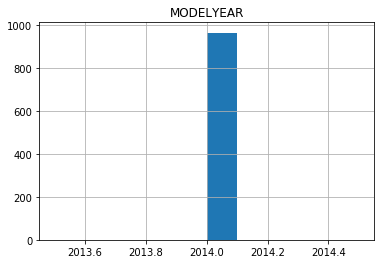

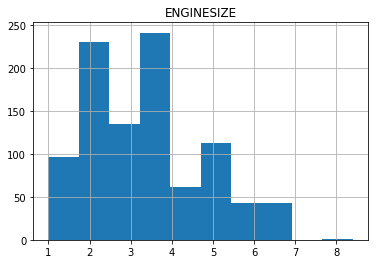

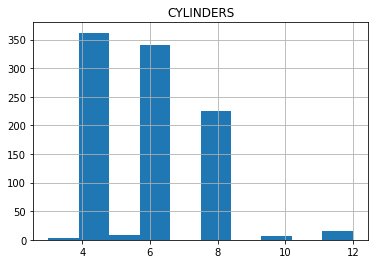

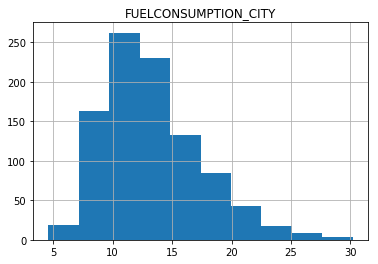

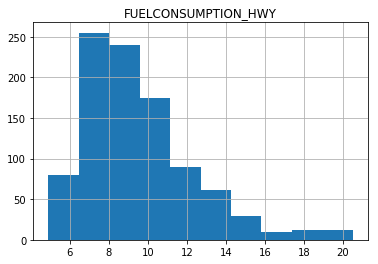

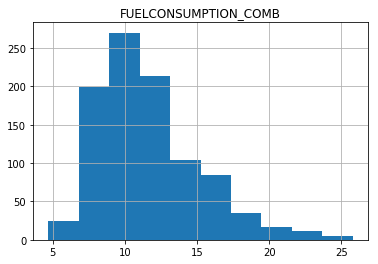

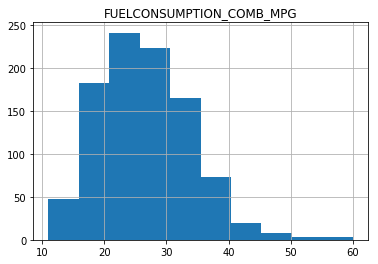

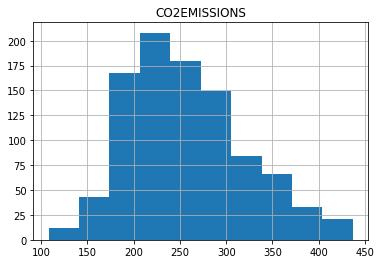

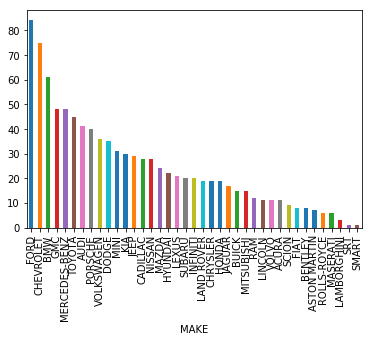

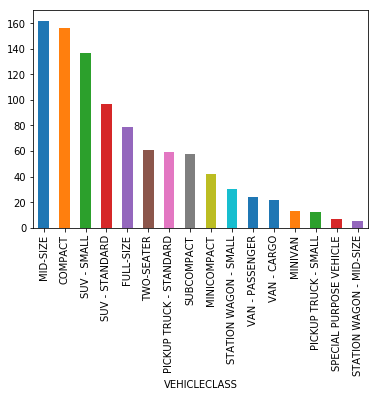

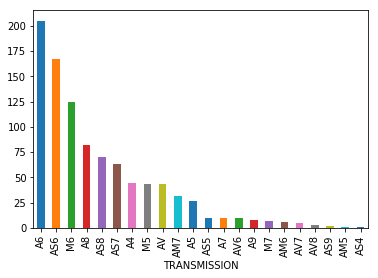

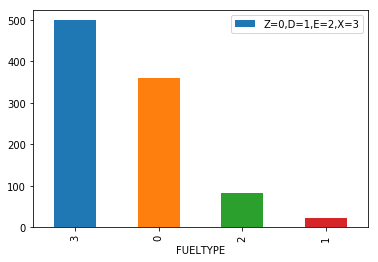

In [10]:
data.hist(column='MODELYEAR')
data.hist(column='ENGINESIZE')
data.hist(column='CYLINDERS')
data.hist(column='FUELCONSUMPTION_CITY')
data.hist(column='FUELCONSUMPTION_HWY')
data.hist(column='FUELCONSUMPTION_COMB')
data.hist(column='FUELCONSUMPTION_COMB_MPG')
data.hist(column='CO2EMISSIONS')

plt.figure()
data['MAKE'].value_counts().plot.bar()
plt.xlabel("MAKE")

plt.figure()
data['VEHICLECLASS'].value_counts().plot.bar()
plt.xlabel("VEHICLECLASS")

plt.figure()
data['TRANSMISSION'].value_counts().plot.bar()
plt.xlabel("TRANSMISSION")

plt.figure()
data['FUELTYPE'].value_counts().plot.bar()
plt.xlabel("FUELTYPE")
plt.legend(['Z=0,D=1,E=2,X=3'])


# part 7

in this section we want to normalize our numerical data 

In [11]:
def normalize(df):
    a = df.values
    m = a.mean()
    s = a.std()
    if s == 0:
        return df
    for i in range(len(a)):
        a[i] = (a[i] + m) / s
    df = pd.DataFrame(a)
    return a

data['MODELYEAR'] = normalize(data['MODELYEAR'])
data['ENGINESIZE'] = normalize(data['ENGINESIZE'])
data['CYLINDERS'] = normalize(data['CYLINDERS'])
data['FUELCONSUMPTION_CITY'] = normalize(data['FUELCONSUMPTION_CITY'])
data['FUELCONSUMPTION_HWY'] = normalize(data['FUELCONSUMPTION_HWY'])
data['FUELCONSUMPTION_COMB'] = normalize(data['FUELCONSUMPTION_COMB'])
data['FUELCONSUMPTION_COMB_MPG'] = normalize(data['FUELCONSUMPTION_COMB_MPG'])
data['CO2EMISSIONS'] = normalize(data['CO2EMISSIONS'])

data

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
E:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,3.874417,5.524779,AS5,0,5.615367,5.727116,5.712510,7,7.159954
1,1,2014,ACURA,ILX,COMPACT,4.164446,5.524779,M6,0,5.929293,6.080231,6.024640,7,7.555321
2,2,2014,ACURA,ILX HYBRID,COMPACT,3.511881,5.524779,AV7,0,4.673590,5.409314,4.974747,9,6.211075
4,4,2014,ACURA,RDX AWD,SUV - SMALL,4.962025,6.649816,AS6,0,6.146626,6.433345,6.308395,7,7.919058
5,5,2014,ACURA,RLX,MID-SIZE,4.962025,6.649816,AS6,0,6.098329,6.080231,6.138142,7,7.697653
6,6,2014,ACURA,TL,MID-SIZE,4.962025,6.649816,AS6,0,6.074181,6.221476,6.166517,7,7.729282
7,7,2014,ACURA,TL AWD,MID-SIZE,5.107040,6.649816,AS6,0,6.315663,6.539279,6.450272,6,8.093019
8,8,2014,ACURA,TL AWD,MID-SIZE,5.107040,6.649816,M6,0,6.460551,6.715836,6.592150,6,8.282795
9,9,2014,ACURA,TSX,COMPACT,4.164446,5.524779,AS5,0,5.784404,6.009608,5.911138,7,7.412989
10,10,2014,ACURA,TSX,COMPACT,4.164446,5.524779,M6,0,5.929293,6.221476,6.081391,7,7.618579


# part 8 

at first we will plot sccater of each numerical column with co2 column. 

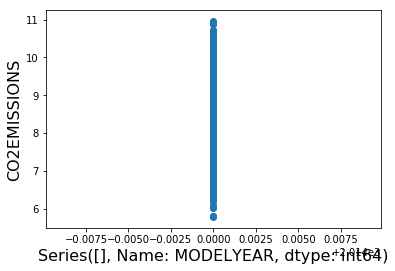

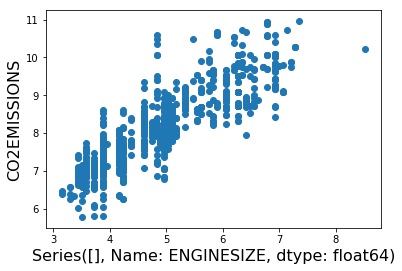

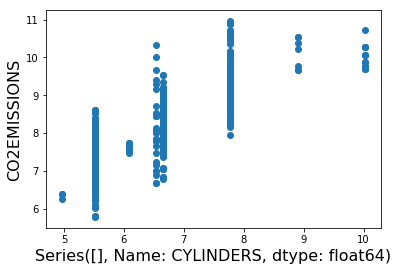

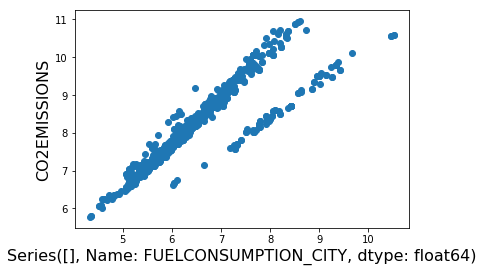

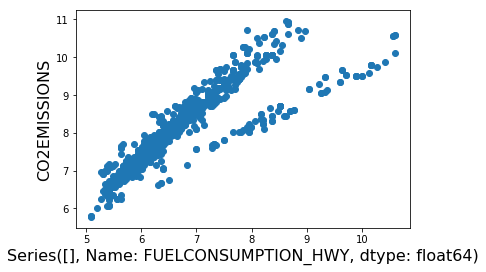

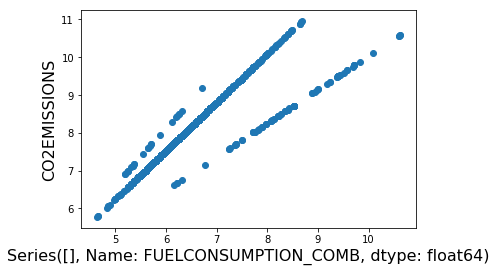

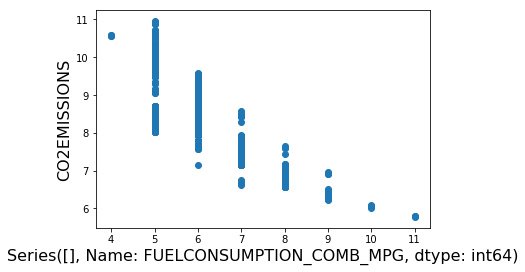

In [12]:
def scatter_hist(df1,df2):
    plt.figure()
    plt.scatter(df1,df2)
    plt.xlabel(df1.head(0), fontsize=16)
    plt.ylabel("CO2EMISSIONS", fontsize=16)
               
               
scatter_hist(data['MODELYEAR'],data['CO2EMISSIONS'])
scatter_hist(data['ENGINESIZE'],data['CO2EMISSIONS'])
scatter_hist(data['CYLINDERS'],data['CO2EMISSIONS'])

scatter_hist(data['FUELCONSUMPTION_CITY'],data['CO2EMISSIONS'])
scatter_hist(data['FUELCONSUMPTION_HWY'],data['CO2EMISSIONS'])
scatter_hist(data['FUELCONSUMPTION_COMB'],data['CO2EMISSIONS'])

scatter_hist(data['FUELCONSUMPTION_COMB_MPG'],data['CO2EMISSIONS'])

Due to the above part we can see FUELCONSUMPTION_COMB_MPG and CO2EMISSIONS have the most Correlation and correlation of FUELCONSUMPTION_COMB and CO2EMISSIONS are second. 
actually we can guess this resulst form their plots, Whatever our scatter polot is linear or Curved in a direction we can say they are correlated.actually what ever the gradient is near to 1, the correlation is more.

# part 9

in this part we want to creat a new data frim with the specefic columns. 

In [13]:
new_data = data[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].copy()
new_data

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,5.712510,7.159954
1,6.024640,7.555321
2,4.974747,6.211075
4,6.308395,7.919058
5,6.138142,7.697653
6,6.166517,7.729282
7,6.450272,8.093019
8,6.592150,8.282795
9,5.911138,7.412989
10,6.081391,7.618579


in this sectoin we will calculate the regression of the scatter plot by the formula wich is mentioend in refrence;
I used simple regression method.
refrence: https://en.wikipedia.org/wiki/Simple_linear_regression

In [14]:
s1 = 0  # soorat
s2 = 0  # makhraj
a = new_data['FUELCONSUMPTION_COMB'].values
b = new_data['CO2EMISSIONS'].values
ma = a.mean()
mb = b.mean()
for i in range(len(a)):
    s1 += (a[i] - ma) * (b[i] - mb)
    s2 += (a[i] - ma) ** 2
b1 = s1 / s2
b0 = mb - b1 * ma
print ('b0 = ',b0)
print ('b1 = ',b1)
print('line equation : ',b1,'x + ',b0,' = y')

b0 =  2.2541742491082974
b1 =  0.888687102778811
line equation :  0.888687102778811 x +  2.2541742491082974  = y


# part 10 

in this section we want to creat MSE function to show amount of mean squared error.

In [15]:
sum = 0
N = len(a)
for i in range(N):
    sum += (b[i] - (lambda x: x * b1 + b0)(a[i])) ** 2
MSE = sum / N
print ('MSE = ',MSE)

MSE =  0.21023523335460212


# part 11

we will plot scatter and regression plot with each other
as we can see regression has a good accurecy in compare of orginal plot.
and accroding to MSE this error is in order of 0.2.

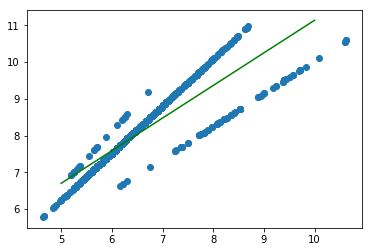

In [16]:
x = np.linspace(5, 10, 100)
y = b1 * x + b0
plt.figure()
plt.scatter(new_data['FUELCONSUMPTION_COMB'], new_data['CO2EMISSIONS'])
plt.plot(x, y,color='g')

# part 12

in this section we wnat to Estimate amount of co2 with the data that we have and the regression function. 
and after that denormalize our data to see the real values.

In [17]:
def denormalize(df):
    a = df.values
    m = a.mean()
    s = a.std()
    if s == 0:
        return df
    for i in range(len(a)):
        a[i] = (a[i] * s) - m
    df = pd.DataFrame(a)
    return a
b0 = 2.2541742491082974
b1 = 0.888687102778811
fuel = new_df['FUELCONSUMPTION_COMB'].values
co2nan = []
for i in fuel:
    co2nan.append(i * b1 + b0)
new_df['CO2EMISSIONS'] = co2nan

new_df['MODELYEAR'] = denormalize(new_df['MODELYEAR'])
new_df['ENGINESIZE'] = denormalize(new_df['ENGINESIZE'])
new_df['CYLINDERS'] = denormalize(new_df['CYLINDERS'])
new_df['FUELCONSUMPTION_CITY'] = denormalize(new_df['FUELCONSUMPTION_CITY'])
new_df['FUELCONSUMPTION_HWY'] = denormalize(new_df['FUELCONSUMPTION_HWY'])
new_df['FUELCONSUMPTION_COMB'] = denormalize(new_df['FUELCONSUMPTION_COMB'])
new_df['FUELCONSUMPTION_COMB_MPG'] = denormalize(new_df['FUELCONSUMPTION_COMB_MPG'])
new_df['CO2EMISSIONS'] = denormalize(new_df['CO2EMISSIONS'])

new_df

E:\anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\sit

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,2.114456,4.976681,AS6,0,33.493170,12.420634,22.653472,150,20.630625
20,20,2014,AUDI,A4 QUATTRO,COMPACT,-0.138303,1.459565,AS8,0,29.122774,10.060104,19.308149,172,17.988606
30,30,2014,AUDI,A8,MID-SIZE,1.363537,4.976681,AS8,3,34.949969,11.712475,22.957592,150,20.870809
42,42,2014,AUDI,Q7,SUV - STANDARD,1.363537,4.620884,AS8,0,42.233964,16.669590,29.039999,122,25.674479
43,43,2014,AUDI,Q7 TDI CLEAN DIESEL,SUV - STANDARD,1.363537,4.976681,AS8,1,34.221570,10.768263,22.045231,158,20.150258
48,48,2014,AUDI,R8 SPYDER,TWO-SEATER,1.850190,8.493797,A7,0,51.338957,16.905643,33.297683,108,29.037048
49,49,2014,AUDI,R8 SPYDER,TWO-SEATER,3.165744,8.493797,M6,0,64.450147,22.570916,42.725413,86,36.482737
60,60,2014,AUDI,S6,MID-SIZE,2.865376,8.493797,A7,0,38.956166,13.836953,25.998796,136,23.272644
66,66,2014,AUDI,TTS COUPE QUATTRO,SUBCOMPACT,-0.138303,1.459565,A6,0,29.122774,11.712475,20.220510,165,18.709157
92,92,2014,BMW,428i COUPE,COMPACT,-0.138303,1.459565,M6,0,25.116577,6.755361,15.354584,200,14.866221


## conclusion : 
with a linear regression we can find a line equation wich can estimate amount of co2 with FUEL CONSUMPTION COMB.
it shows whatever our car has a better FUEL CONSUMPTION, amount of produced co2 is fewer an it is better for enviroment . 
actually we can find data mining is very helpful.

## Refrences : 
https://www.wikipedia.org/

https://www.geeksforgeeks.org/

https://www.w3schools.com/python/